# Artificial Intelligence Project

# Project Name : 
<pre>
Artificial Intelligence Major Project
</pre>

# Problem Statement :
    Create a deep learning model to predict the different types of fashion accessories labeled from 0 to 9.
## Context :
The Fashion-MNIST dataset is a collection of Zalando's article images. It consists of:
1) 60,000 training images.
2) 10,000 test images
Each image is a 28×28 grayscale image, representing a single fashion item. Each image is labeled with a number from 0 to 9, corresponding to one of ten fashion categories.Fashion-MNIST is intended to be a drop-in replacement for the original MNIST dataset and is widely used for benchmarking deep learning models.

## Dataset :
The dataset used in this project is Fashion-MNIST, which contains grayscale images of fashion items. It is a popular dataset used to train and test image classification models. Each image is of size 28x28 pixels and belongs to one of 10 different fashion categories.
There are:
1. T-shirt/top 
2. Trouser 
3. Pullover 
4. Dress 
5. Coat 
6. Sandal 
7. Shirt
8. Sneaker 
9. Bag
10. Ankle boot 

# Steps : 

## 1) Import Libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from sklearn.metrics import classification_report, confusion_matrix

## 2) Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)

Training samples: (60000, 28, 28)
Test samples: (10000, 28, 28)


## 3) Normalize Images

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 4) Reshape For CNN Input

In [42]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## 5) One-Hot Encode Labels

In [45]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train_cat)
print(y_test_cat)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 6) Build CNN Architecture

In [14]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))  
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  

## 7) Compile the Model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 8) Train the Model

In [24]:
history = model.fit( x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat) )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7229 - loss: 0.7761 - val_accuracy: 0.8602 - val_loss: 0.3810
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8592 - loss: 0.3951 - val_accuracy: 0.8810 - val_loss: 0.3256
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8757 - loss: 0.3350 - val_accuracy: 0.8942 - val_loss: 0.2928
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8913 - loss: 0.2962 - val_accuracy: 0.8926 - val_loss: 0.2949
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9007 - loss: 0.2776 - val_accuracy: 0.8976 - val_loss: 0.2747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.9066 - loss: 0.2515 - val_accuracy: 0.9069 - val_loss: 0.2544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9124 - loss: 0.2395 - val_accuracy: 0.9037 - val_loss: 0.2637
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9175 -

## 9) Plot Accuracy and Loss Graphs

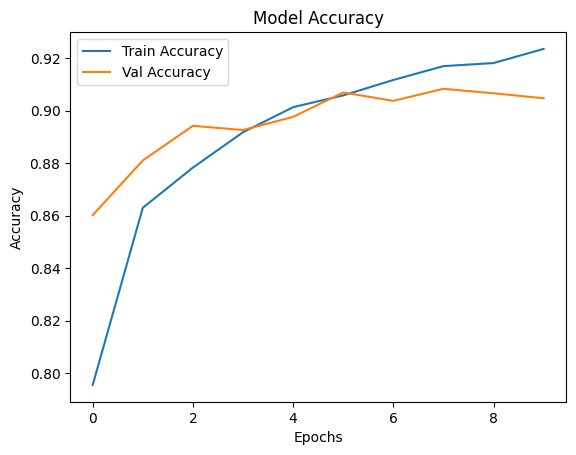

In [25]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

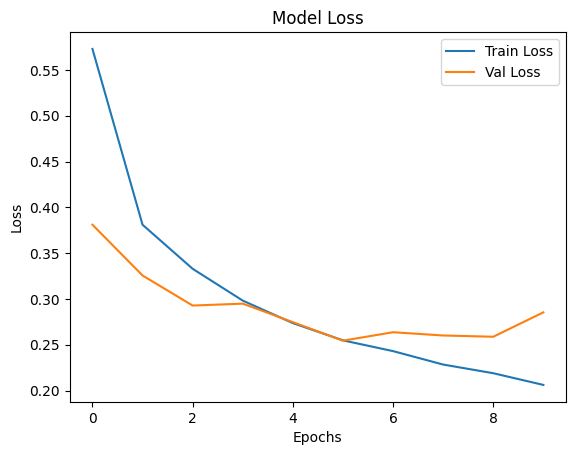

In [26]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 10) Predictions on Test Set

In [37]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_m1 = [int(np.argmax(i)) for i in y_pred_probs]  # Using y_pred_probs instead of ypred
print(y_pred_m1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 4, 7, 2, 1, 6, 6, 4, 4, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 2, 8, 6, 2, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 2, 4, 2, 4, 7, 1, 6, 4

## Predictions on images

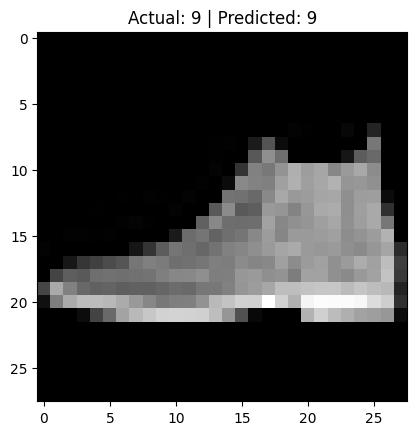

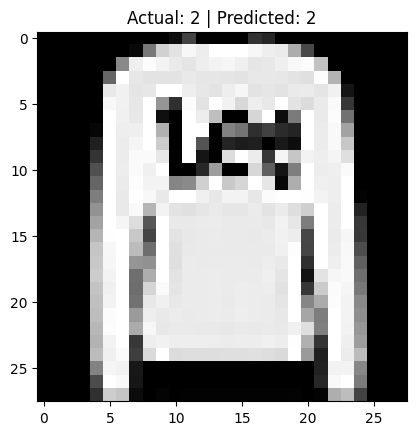

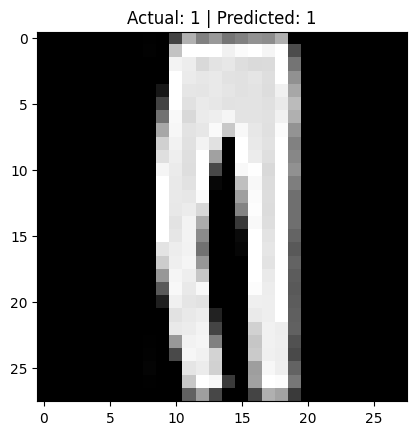

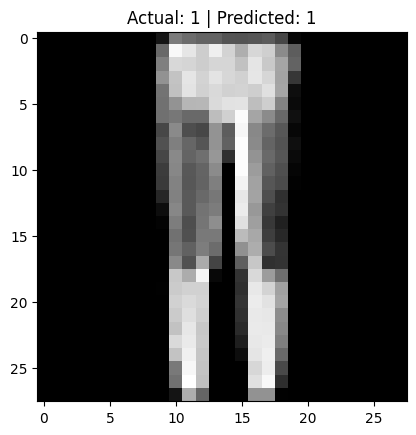

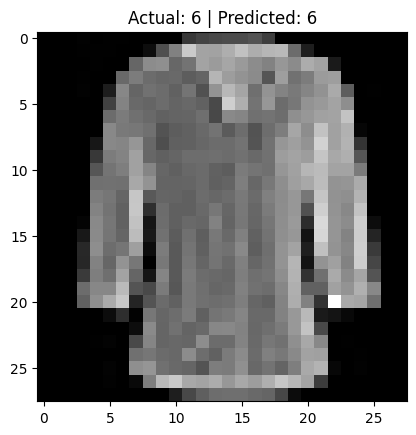

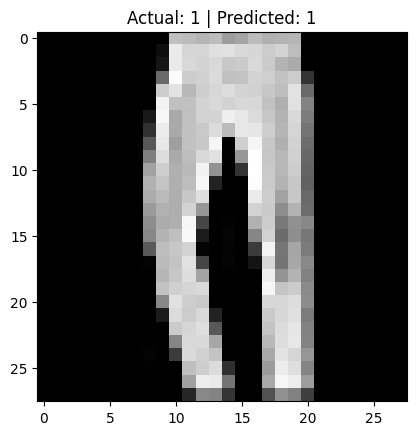

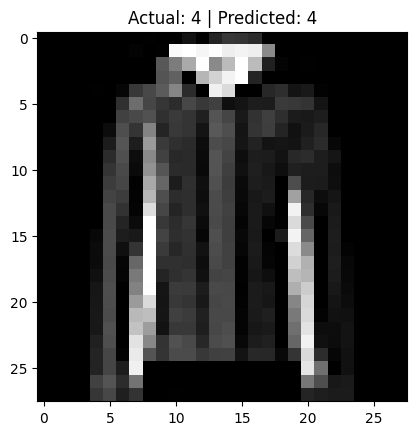

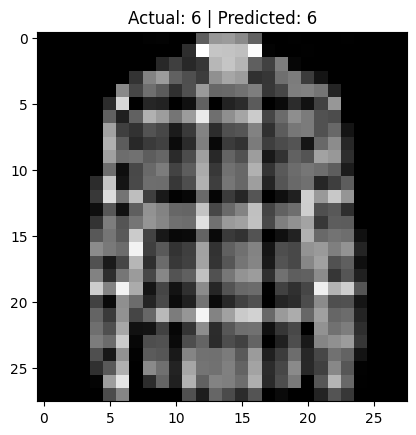

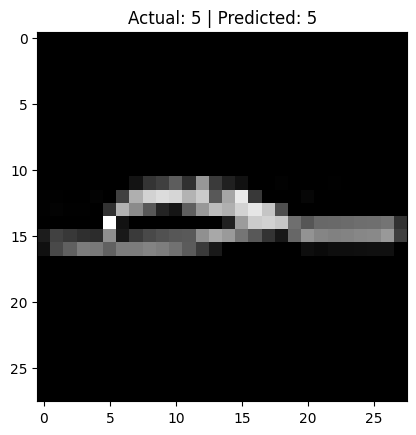

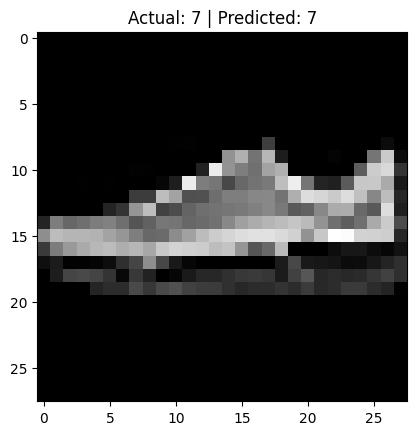

In [41]:
# Now display the images with actual and predicted labels
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Actual: {y_test[i]} | Predicted: {y_pred_m1[i]}")
    plt.show()

## 11) Confusion Matrix and Classification Report 

### Confusion Matrix

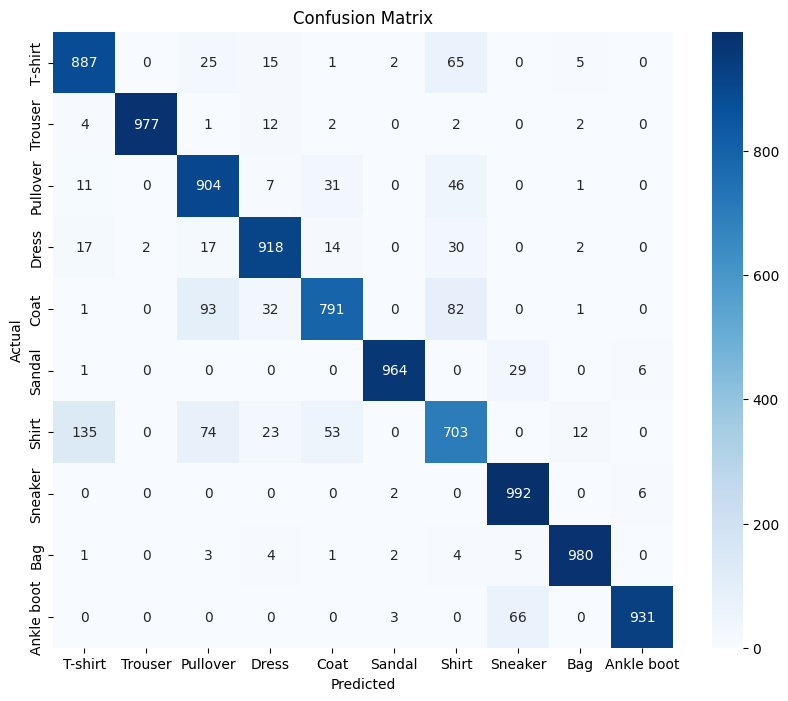

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [29]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))

Classification Report:

              precision    recall  f1-score   support

     T-shirt       0.84      0.89      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.81      0.90      0.85      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.89      0.79      0.84      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.75      0.70      0.73      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



## 12) Evaluate Final Accuracy

In [30]:
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"\nFinal Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9055 - loss: 0.2912

Final Test Accuracy: 90.47%


## Conclusion

In this project, I designed and trained a Convolutional Neural Network to classify fashion items from the Fashion-MNIST dataset.The model achieved a test accuracy of 90%, which shows it was able to correctly identify most of the images.
It performed very well on items like trousers, bags, and sandals, while it found categories like shirts slightly more challenging.Using tools like confusion matrix and classification report helped me understand where the model was strong and where it could improve.
Overall, this project gave me good practical experience with deep learning and CNNs.I gained a clear understanding of how image classification works, and I’m satisfied with the results and the knowledge I gained.